In [3]:
# Leemos información del documento Excel
import pandas as pd
df= pd.read_csv('../database.csv', sep=';')
print(df)

                    ID  Class
0      MARCA_2 (1).png    Sin
1      MARCA_2 (2).png    Sin
2      MARCA_2 (3).png    Sin
3      MARCA_2 (4).png    Sin
4      MARCA_2 (5).png    Sin
..                 ...    ...
395  MARCA_1 (196).png  Marca
396  MARCA_1 (197).png  Marca
397  MARCA_1 (198).png  Marca
398  MARCA_1 (199).png  Marca
399  MARCA_1 (200).png  Marca

[400 rows x 2 columns]


In [4]:
# Extraer información de interés
import numpy as np
clases, frec = np.unique(df.Class, return_counts=True)
print(clases, frec)

['Marca' 'Sin'] [200 200]


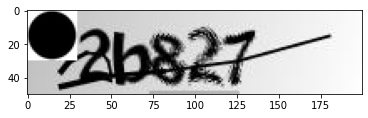

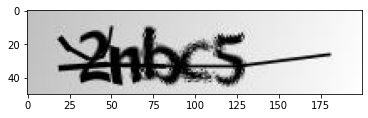

In [9]:
# Se trata de averiguar que imagenes tienen una marca de agua y otras no, se muestra a continuación las imágenes
import random
import cv2
import matplotlib.pyplot as plt


img_marca = cv2.imread('../con_marca_agua/Marca_1 (1).png')
img_sin_marca= cv2.imread('../sin_marca_agua/Marca_2 (1).png')
plt.imshow(img_marca, cmap='gray')#mostramos imagen con marca de agua
plt.show()
plt.imshow(img_sin_marca, cmap='gray')#mostranmos imagen sin marca de agua
plt.show()

#Podemos ver que la diferencia de una a la otra es una muy obvia, la marca de agua es unc ciruclo en la imagen
# con la ayuda de la extracción de los descriptores de textura podremos clasificar nuestra base de datos y predecir según dos clasificadores, las que llevan marca de agua o no.


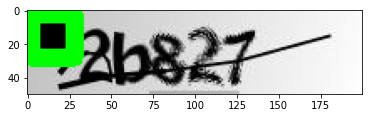

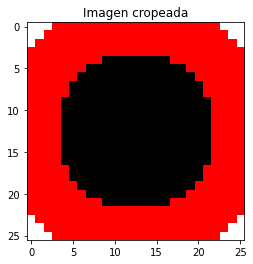

In [65]:
#A continuación se entra más detalle con descriptores de forma , el circulo que se distingue como la marca de 
#agua para comprender mejor el problema.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from re import search
from skimage.measure import label
from skimage.morphology import convex_hull_image
from skimage.feature import greycomatrix, greycoprops
import math
from skimage.measure import label
from skimage.measure import regionprops
from skimage.morphology import convex_hull_image




img_gray_2 = cv2.cvtColor(img_marca, cv2.COLOR_BGR2GRAY)
_,binary  = cv2.threshold(img_gray_2,0,1,cv2.THRESH_OTSU)
inverted_image_2=np.invert(binary)
   
#Con la ayuda del filtro de erosion podemos establecer mejor el elemento en la imagen
kernel=np.ones((3,3),np.uint8)
erosion=cv2.erode(inverted_image_2,kernel)
#Visualizamos que elemento define la marca de agua  
lab, num = label(erosion, return_num=True)

v,c = np.unique(lab, return_counts=True)



objeto = lab == 2
objeto = objeto.astype('uint8')

prop = regionprops(objeto)
bbox = prop[0].bbox

start_point = (bbox[1], bbox[0])
end_point = (bbox[3], bbox[2])
window = cv2.rectangle(img_marca.copy(), start_point, end_point, (0, 255, 0), 10)
                     
plt.imshow(window, cmap='gray')
plt.show()
   
convex_image = convex_hull_image(objeto)
convex_image = convex_image.astype('uint8')


conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Encontramos los contornos en una máscara 
imagen = cv2.drawContours(img_marca.copy(), conts, -1, (255,0,0), 5) # Dibujamos los contornos
crop=imagen[bbox[0]:bbox[2],bbox[1]:bbox[3]]

plt.imshow(crop,cmap='gray')
plt.title('Imagen cropeada')
plt.show()
#Como podemos ver en la imagenes ploteadas, vemos el elemento con exactitud al que diferencia la marca a sin marca


Como podemos ver ploteado en las anteriores imágenes, se utilizará un clasificador capacitado para obtener la diferencia entre las que llevan marca de agua a las que no.